<a href="https://colab.research.google.com/github/Kathi3/ChimmieChunky/blob/main/MEDICALCAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
#from mlxtend.plotting import plot_confusion_matrix


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [ ]:
#DATA LOADING AND CLEANING

In [48]:
Med_Camp = pd.read_csv('/content/Insurance.csv')
Med_Camp.head()

,AGE,SEX,BMI,CHILDREN,SUBSTANCE ABUSE,AFRICA REGION,CHARGES
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
Med_Camp.dtypes

AGE                  int64
SEX                 object
BMI                float64
CHILDREN             int64
SUBSTANCE ABUSE     object
AFRICA REGION       object
CHARGES            float64
dtype: object

In [5]:
Med_Camp.shape

(1338, 7)

In [6]:
from pandas_profiling import ProfileReport

In [7]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [8]:
profile = ProfileReport(Med_Camp, title = "Pandas Profiling Report")
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
Med_Camp.isna().any()

AGE                False
SEX                False
BMI                False
CHILDREN           False
SUBSTANCE ABUSE    False
AFRICA REGION      False
CHARGES            False
dtype: bool

In [11]:
Med_Camp.describe()

,AGE,BMI,CHILDREN,CHARGES
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
Med_Camp.duplicated().sum()

1

In [13]:
Med_Camp.isnull().sum()

AGE                0
SEX                0
BMI                0
CHILDREN           0
SUBSTANCE ABUSE    0
AFRICA REGION      0
CHARGES            0
dtype: int64

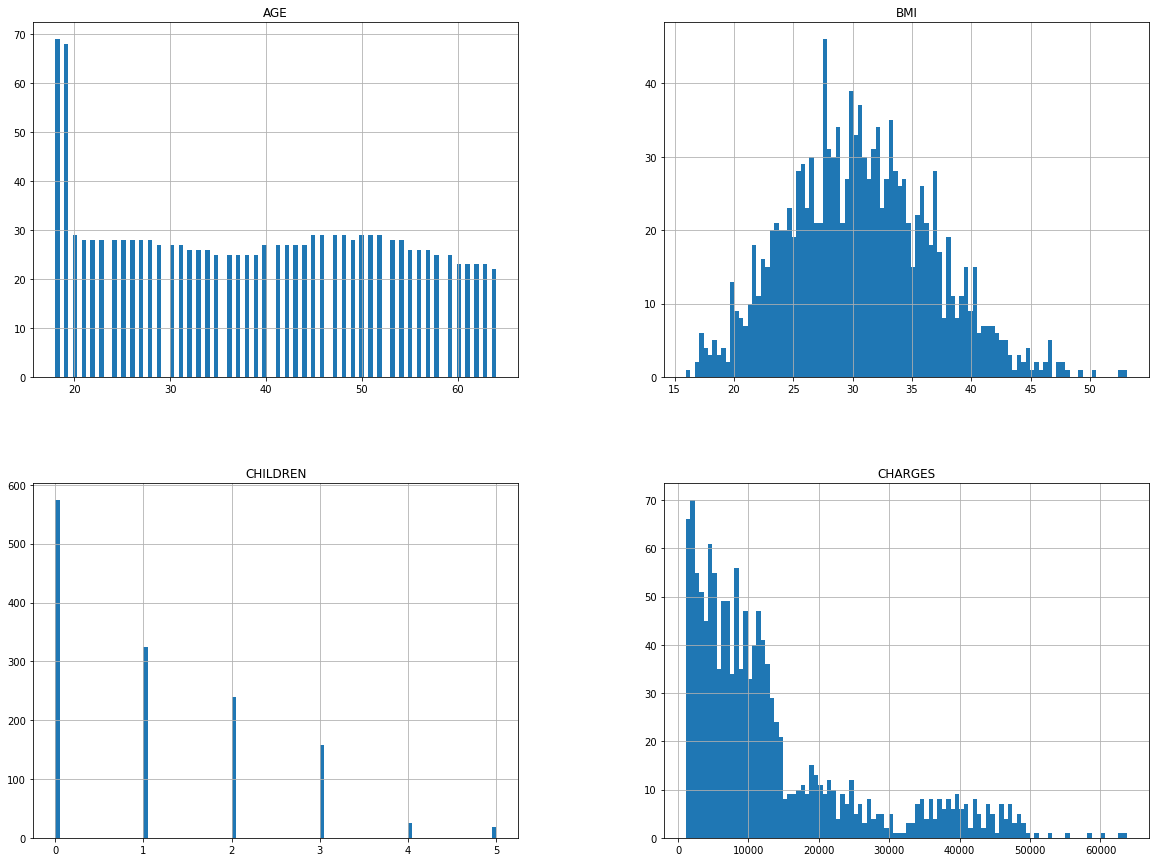

In [17]:
Med_Camp.hist(bins = 100, figsize = (20,15))
plt.show()

In [119]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

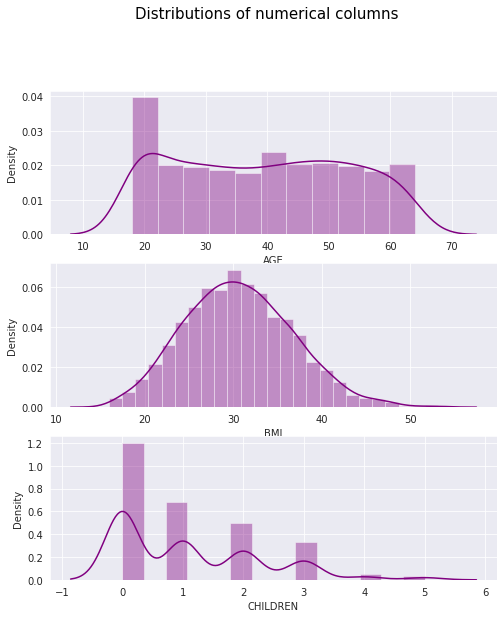

In [120]:
columns = ['AGE','BMI','CHILDREN']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (8, 9))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), Med_Camp, columns):
  sns.distplot(Med_Camp[name], ax = ax, kde = True, color = 'purple')

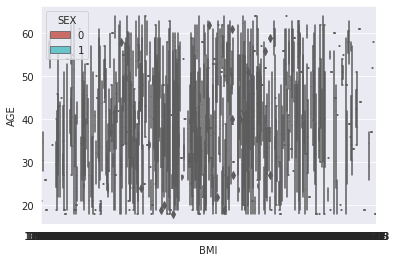

In [122]:
sns.boxplot(x='BMI', y='AGE', hue='SEX', data=Med_Camp, palette = 'hls')

In [123]:
for column in columns:
  print(column +':' + str(Med_Camp[column].median()))

AGE:39.0
BMI:30.4
CHILDREN:1.0


In [124]:
for column in columns:
  print(column +':' + str(Med_Camp[column].mode()))

AGE:0    18
dtype: int64
BMI:0    32.3
dtype: float64
CHILDREN:0    0
dtype: int64


In [126]:
C_C = ['SEX', 'SUBSTANCE ABUSE']

## ** Tensor Flow Model - To be used with ANN Algorithm**

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Import a standardization library
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [51]:
C_C = ['SEX', 'SUBSTANCE ABUSE']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Med_Camp[C_C] = Med_Camp[C_C].apply(lambda col:le.fit_transform(col))

In [52]:
Med_Camp.dtypes

AGE                  int64
SEX                  int64
BMI                float64
CHILDREN             int64
SUBSTANCE ABUSE      int64
AFRICA REGION       object
CHARGES            float64
dtype: object

In [53]:
Med_Camp.pop('AFRICA REGION')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: AFRICA REGION, Length: 1338, dtype: object

In [80]:
Med_Camp.head()

,AGE,SEX,BMI,CHILDREN,SUBSTANCE ABUSE,CHARGES
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [81]:
X = Med_Camp.iloc[:, 0:5].values
y = Med_Camp.iloc[: , 5].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [83]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [93]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 10, epochs = 10, verbose = 1)
y_pred = model(X_test)

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3329 - accuracy: 0.8631
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.8650
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3305 - accuracy: 0.8656
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3286 - accuracy: 0.8641
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8630
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8673
Epoch 7/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8661
Epoch 8/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8656
Epoch 9/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8664
Epoch 10/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8675

In [94]:
y_pred = model.predict(X_test)

In [96]:
[Loss, accuracy_score] = model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8565


In [97]:
Loss

0.3535570502281189

In [98]:
accuracy_score

0.8565000295639038

Conclusions

a) The age, BMI and Gender all seem to affect the medical charges and as such, increase the insurance price.